# Projet Processus de Hawkes
 *Lafontas Florian - Pommier Achille - Lauilhe Thibault*


Dans le cadre de notre projet, nous allons étudier les processus de Poissons simulés par algorithme de thinning et plus particulièrement les processus de Hawkes.

Dans un premier temps, nous définirons ce qu’est un processus de Hawkes en partant de la modélisation d’un processus de Poisson homogène, inhomogène et de la définition du ‘thinning’. Dans une deuxième partie, nous décrirons les propriétés, l’intérêt et les limites d’un tel type de processus comparativment à d’autres types de processus et comment ce processus est utilisé. Dans une dernière partie nous illustrerons sur Python ce que nous avons décrit pour les processus de Hawkes à travers des simulations, notamment orientées sur le tracé de son intensité, son processus de comptage, et la simulation de l’algorithme d’Ogata (dérivé du thinning).

## I- Rappels sur les processus de Poisson

Pour commencer, il convient de faire quelques rappels sur les processus et plus particulièrement les processus de Poisson homogènes et inhomogènes.

### A- Définition et propriétés des processus de Poisson homogènes

### Définition 1 (Processus de Poisson homogène)

Un processus ponctuel $N$ est dit être un processus de Poisson homogène avec un taux $\lambda > 0$ si :
1. $N_0 = 0$.
2. Le processus a des incréments indépendants.
3. Le nombre de points dans tout intervalle de longueur $t > 0$ suit une distribution de Poisson avec un paramètre $\lambda t$, c'est-à-dire, pour tout $s \geq 0$,
   $N_{s+t} - N_s \sim P(\lambda t)$.

Le paramètre $\lambda$ est également appelé l'intensité du processus ponctuel de Poisson.

### Propriété 1 (Caractértistiques d'un processus de Poisson homogène)

Soit $N$ un processus de Poisson homogène avec une intensité $\lambda > 0$.

1. $N$ a des incréments stationnaires.
2. La fonction moyenne de $N$ est égale à
   Pour tout $t \geq 0$, $m(t) = E[N_t] = \lambda t$.
   En particulier, le taux (voir Définition 2.7) du processus de Poisson $N$ est constant (égal, comme prévu, à $\lambda$) :
   Pour tout $t \geq 0$, $w(t) = \lambda$.
3. On a lorsque $t \to 0$,

   (a) $P(N_t = 0) = e^{-\lambda t} = 1 - \lambda t + o(t)$.
   
   (b) $P(N_t = 1) = \lambda te^{-\lambda t} = \lambda t + o(t)$.
   
   (c) $P(N_t \geq 2) = \sum_{k=2}^{\infty} \frac{(\lambda t)^k}{k!}e^{-\lambda t} = o(t)$.

Pendant une période d'observation d'un processus aléatoire, $N_t$ désigne le processus de comptage, c'est-à-dire le nombre d'événéments se produisant jusqu'à l'instant t. Le processus ponctuel N correspond à $N = (N_t)_{t \in \mathbb{R}}$.

Les accroissements d'un processus correspondent à $N_{t+s}-N_s \quad \forall t,s$. Une des propriétés du processus de Poisson homogène est que les accroissements de ce processus sont dits indépendants (intervalles disjoints) et stationnaires. De plus, ils suivent une loi de Poisson de paramètre $\lambda t$.

Les temps d’arrivée $T_k$ désignent le premier instant où le comptage devient supérieur à k. Nous avons la relation $\sum_{n \geq 1} 1_{\{T_n \leq t\}}$
Pour un processus de Poisson homogène les temps d’arrivée sont répartis à intervalle réguliers dans le temps. Pour une valeur de n fixée, ils sont associés à une densité $f_{T_i} : (t_1,...,t_1) \rightarrow \lambda^n e^{-\lambda t_n} 1_{0<t_1<...<t_n}$. Pour une valeur de T fixée, la répartition des événéments, que l'on peut visualiser avec la loi conditionnelle de $(T_1,T_2,...,T_n) | \{N_t =n\}$ est équivalente à des lois uniformes que l'on ordonne.

On peut également définir $W_k=T_k-T_{k-1}$ les « temps des inter-arrivées » d’un processus, c’est-a-dire le temps qui sépare deux événéments successifs. Les Wk sont considérés comme des variables aléatoires indépendantes et identiquement distribuées (i.i.d) et suivent une distribution exponentielle de paramètre lambda pour un processus de Poisson homogène donné.

A partir de cette définition des $W_k$ et des $N_t$, on obtient la propriété suivante pour le processus de comptage $(N_t)_{t \in \mathbb{R}}$ :

### Propriété 2 (Processus de comptage)

Sous l'hypothèse que les $W_i$ sont bien des variables aléatoires i.i.d de distribution exp($\lambda$), pour tout $t \in \mathbb{R}^+$ et tout $n \in \mathbb{N}$,
$P(N_t = n) = \frac{(\lambda t)^n}{n!} e^{-\lambda t}$.

En particulier, pour tout $t > 0$, $N_t \sim P(\lambda t)$.


Cependant, les processus de Poisson homogènes sont caractérisés par une intensité $\lambda$ constante à travers le temps, ce qui n’est pas adéquat si l’on veut modéliser des phénomènes dont la loi qui régit la probabilité d’occurence d’un événément peut varier.

### Généralisation au concept de processus de Poisson inhomogène

C’est pourquoi il est important d’introduire la notion de processus de Poisson inhomogène. Les processus de Poisson inhomogènes généralisent le concept de processus de Poisson mais reposent cette fois-ci sur la définition d’une intensité lambda variable à travers le temps. Les accroissements du processus ne sont cette fois plus stationnaires mais seulement indépendants.

Pour construire un processus de Poisson inhomogène, la procédure utilisée repose sur la simulation de processus de Poisson homogène et l’application d’un algorithme appelé algorithme de thinning.

### A - Introduction de l'algorithme de thinning

L’algorithme de thinning est un outil fondamental pour générer des réalisations d'un processus de Poisson inhomogène à partir d'un processus de Poisson homogène. Son application repose sur l’hypothèse que $\lambda:\mathbb{R}{+} \rightarrow \mathbb{R}{+}^{*}$ est une fonction positive localement intégrable, et que l’on peut borner cette fonction par un majorant $M$, que l'on fixe comme étant égale à la valeur maximale de $\lambda$, notée $\lambda_{max}$, qui peut être considérée comme l'intensité d'un processus de Poisson homogène $N$.

Nous commençons par simuler le processus de Poisson homogène $N$ avec une intensité constante égale à $\lambda_{max}$, et obtenons les temps d'arrivée $\tau_i$ des événements associés à ce processus.

Ensuite, à partir de ce processus de Poisson homogène $N$, de ses temps d'arrivée $\tau_i$ et de la fonction $\lambda(t)$ bornée par $M$, l’algorithme simule un processus de Poisson inhomogène d’intensité $\lambda(t)$ variant dans le temps. Pour ce faire, il simule d’abord une variable aléatoire de loi uniforme $U(0,M)$ et l'utilise pour générer des instants de temps candidats sur chaque intervalle entre deux événements du processus homogène. Cette simulation provient de la propriété selon laquelle la loi conditionnelle de $(T_1,T_2,...,T_n) | {N_t =n}$, où $N_t$ représente le nombre d'événements jusqu'au temps $t$, est équivalente à des lois uniformes que l'on ordonne.

Ensuite, l’algorithme compare la valeur de chaque point candidat obtenue par la loi uniforme $U(0,M)$ avec la valeur en son abscisse de la fonction $\lambda(t)$, qui représente l'intensité du processus inhomogène. Si le point généré est au-dessus de la courbe $\lambda(t)$ et en dessous de $M$, le point candidat est rejeté. Mais s'il est en dessous de la courbe, il est accepté et défini comme un instant de temps dans le processus de Poisson inhomogène."

Finalement, nous obtenons une liste d’indices de temps, ce sont les temps d’arrivée de notre processus inhomogène déterminés en regroupant uniquement les temps $\tau$ conservés.

Les processus de Poisson inhomogènes ainsi générés sont très utiles car ils permettent de modéliser des situations où l’intensité des occurrences n’est pas constante au cours du temps, ce qui est bien moins contraignant.

Nous pouvons illustrer ce mécanisme de thinning à travers la simulation suivante.


In [ ]:
#INSERER THINNING ALGORITHM TP


# III- Introduction des processsus de Hawkes

Cependant, dans le cadre de notre projet, nous désirons étudier des événéments commes les séismes, l’épidémiologie, ou des comportements humains comme la propagation de rumeurs ou les mouvements de foules. Ces objets d’étude font intervenir la notion de réplique : à partir de l’instant où un événement se produit, nous avons de grandes chances de voir un autre événément lui succéder très rapidement après. Le concept de processus de Poisson inhomogène ne suffit pas afin de modéliser ce genre d’événements.

Il faudrait alors introduire un nouveau type de processus dont l’intensité dépendrait du temps comme pour le processus de Poisson inhomogène, mais également des événéments passés, c’est-à-dire des paramètres $ \tau_i$.

Nous appelerons ce type de processus le processsus de Hawkes.

Pour faire intervenir les événements passés dans le calcul de l’intensité, il est néessaire de spécifier la notion de filtration d’un processus.


#### Définition 2 : Filtration naturelle (Grandell, 1997) :
« Pour tout processus $N(t)$, la filtration naturelle $\mathcal{F}_N = ((\mathcal{F}_{N_t}$ ; $t \leq 0$) est définie par $\mathcal{F}_{N_t} = \sigma \{N(s); \, s \leq t\}$. En d'autres termes, $\mathcal{F}_{N_t}$ est l'algèbre $\sigma$ générée par $N$ jusqu'au temps $t$, et représente l'historique interne de $N$ jusqu'au temps $t$. »


La filtration est le concept mathématique qui définira le passé de notre processus. A partir de ce concept, nous pouvons désormais définir mathématiquement le processus de Hawkes de la manière suivante.


### Définition 3 : Procesus de Hawkes (Hawkes, 1971, p.84, (7) and (8))

Un processus ponctuel univarié simple $N(t)$ satisfait les conditions suivantes :

(i) $N(t) = 0$.

(ii) $\lambda(t)$ est un processus stochastique à gauche continu donné par l'intégrale de Stieltjes
\[
$\lambda(t) = \mu + \int_0^t \alpha e^{-\beta(t-s)} \, dN(s)  \mu + \sum_{s < t} \phi (t-s)= \mu + \sum_{{k: t_k < t}} \alpha e^{-\beta(t-t_k)}$
\]

où $\mu > 0$ et $0 < \alpha < \beta$ et $\phi$ est appelé le noyau du processus.

(iii) $\lambda(t)$ est l'intensité stochastique du processus ponctuel
\[
$P\{N(t + h) - N(t) = 1 \, | \, \mathcal{F}_{N_t^-}\} = \lambda(t)h + o(h)$
\]

(iv) Le processus ponctuel est ordonné
\[
$P\{N(t + h) - N(t) \geq 2 \, | \, \mathcal{F}_{N_t^-}\} = o(h)$
\]
et est appelé un processus de Hawkes univarié avec décroissance exponentielle sur $[0, \infty)$.

Maintenant que nous avons défini le processus et son intérêt pour modéliser les événéments caractérisés par des répliques, nous allons à présent présenter les variantes qui existent et les propriétés qui caractérisent ce processus.


Dans la littérature scientifique, nous remarquons qu'il existe plusieurs formes d'applications du processus de Hawkes : en fonction de l'expression que l'on prend pour l'intensité conditionnelle $\lambda*$. La fonction d'excitation $\mu$, et le noyau $\phi (u)$ peuvent ainsi prendre différentes formes.

En effet, dans le cas que nous allons voir ci-dessous, on exploitera une intensité qui suit une décroissance exponentielle, mais d'autres processus de Hawkes existent et correspondent à des modèles où la fonction d'excitation est différente. Au lieu d'être une exponentielle décroissante (notre cas), $\mu$ peut être modélisé par $\mu(t) = \frac{K}{(c + t)^p}$ pour le modèle dit "modèle puissance". Et $\lambda^*(t) = \mu + \sum_{t_i < t} \frac{K \exp(\alpha(m_i - M_0))}{(t - t_i + c)^p}
$ pour le modèle dit "ETAS" (Epidemic Type Afterschock Sequence model), très populaire en sismologie. Pour les processus de Hawkes avec noyau d'Erlang, davantage efficaces dans des cas réels, $\phi (u)$ s'écrit $\phi(u) = \frac{\beta^{\kappa} u^{\kappa - 1} e^{-\beta u}}{(\kappa - 1)!}$.

#### Espérance du processus de Hawkes pour notre modèle

Pour rappel, notre intensité $\lambda$ est défini comme $\mu + \displaystyle\sum_{{k: t_k < t}} \alpha e^{-\beta(t-t_k)}=\mu + \displaystyle\sum_{{k: t_k < t}} \Phi(t-t_k)$ où $\Phi(t-t_k)=\alpha e^{-\beta(t-t_k)}$. Soit H un processus de Hawkes avec une intensité $\lambda$. Pour avoir une expression de son espérance, on introduit le processus M défini par : $$\forall t \geq 0, M(t)=H(t) - \displaystyle \int_{0}^{t} \lambda(s)ds$$
et on admet que c'est une martingale. Dans ce cas, l'espérance de M est constante : $\mathbb{E}[M(t)]=\mathbb{E}[M(0)]=\mathbb{E}[H(0)]=0$ et on a que $$\mathbb{E}[H(t)]=\mathbb{E}[\displaystyle \int_{0}^{t} \lambda(s)ds]=\displaystyle \int_{0}^{t} \mathbb{E}[\lambda(s)]ds$$ par le théorème de Fubini car $\lambda$ est positif et intégrable. Posons $f_t=\mathbb{E}[\lambda_t]$ et admettons que $f_t=\mu + \displaystyle \int_{0}^{t} \Phi(t-s)\mathbb{E}[\lambda_s]ds=\mu + \displaystyle \int_{0}^{t} \Phi(t-s)f_s ds$. On obtient une équation intégrale de Volterra : 

\begin{eqnarray*}
   f(t) & = &  \mu + \displaystyle \int_{0}^{t} \Phi(t-s)f_s ds\\
               & = &  \mu + \displaystyle \int_{0}^{t} \alpha e^{-\beta(t-s)}f_s ds \\
               & = &  \mu + \alpha e^{-\beta t}\displaystyle \int_{0}^{t} e^{\beta s}f_s ds \\
\end{eqnarray*}

Et en dérivant f(t), on obtient : 

\begin{eqnarray*}
   f'(t) & = & -\beta \times \alpha e^{-\beta t}\displaystyle \int_{0}^{t} e^{\beta s}f_s ds + \alpha e^{-\beta t} \times e^{\beta t} f_t\\
               & = &  -\beta(f_t-\mu) + \alpha f_t \\
               & = &  (\alpha - \beta)f_t + \beta \mu
\end{eqnarray*}

On obtient donc $f'(t) - (\alpha - \beta)f_t = \beta \mu$, une équation différentielle du premier ordre avec second membre constant dont la solution est donné par : $$f_t = Ce^{-(\beta - \alpha)t} - \frac{\beta\mu}{\alpha - \beta}$$ avec $C \in \mathbb{R}$. Or on sait que $\lambda(0)=\mu$ d'où $C=\displaystyle\frac{\mu\alpha}{\alpha - \beta}$ et : $$f_t = \mathbb{E}[\lambda_t] = \displaystyle\frac{\mu}{\alpha - \beta}(\alpha e^{-(\beta - \alpha)t} - \beta)$$

En intégrant, on trouve que : 

\begin{eqnarray*}
   \mathbb{E}[H_t] & = & \displaystyle \int_{0}^{t} \mathbb{E}[\lambda(s)]ds \\
               & = &  \displaystyle\frac{\mu}{\alpha - \beta} \displaystyle\int_{0}^{t} (\alpha e^{-(\beta - \alpha)s}-\beta)ds \\
               & = &  \displaystyle\frac{\mu}{\alpha - \beta} (\displaystyle\int_{0}^{t} \alpha e^{-(\beta - \alpha)s}ds - \displaystyle\int_{0}^{t}\beta ds) \\
               & = &  \displaystyle\frac{\mu}{\alpha - \beta} (\frac{\alpha}{\alpha - \beta}(e^{-(\beta - \alpha)t}-1)-\beta t) \\
\end{eqnarray*}

[ AJOUTER PROPRIETES DU PROCESSUS DE HAWKES] voir https://inria.hal.science/hal-02947341/file/Processus_de_hawkes1.pdf

[Pro






## A - Introduction de l'algorithme d'Ogata pour la construction du processus de Hawkes

Encore aujourd'hui, il est difficile de déterminer des propriétés bien définies pour le processus de Hawkes. Une des propriétés les plus importantes associées au processus de hawkes est son espérance qui est calculable.


[...]


De manière similaire à la construction d'un processus de Poisson inhomogène, la création d'un processus de Hawkes constitue un enjeu majeur.

Pour générer un processus de Hawkes, nous appliquerons un procédé similaire au thinning utilisé pour le processus de Poisson inhomogène.

Nous allons introduire l’algorithme d’Ogata (1981) qui permet de simuler le processus de Hawkes à partir du mécanisme du thinning. Cette fois-ci l’intensité lambda(t) du processus à simuler varie non seulement en fonction du temps mais aussi en fonction des temps $\tau _i$ précédents. Plus un point candidat sera proche du $\tau_i$ précédent, plus sa probabilité d’être accepté sera grande.


On commence simuler dans un premier temps un lambda constant, que l’on peut visualiser comme l’intensité d’un processus de Poisson homogène N. A la manière de l’algorithme du thinning, on détermine des points candidats pour chaque temps d'arrivée $\tau_i$ en simulant une loi uniforme U(0,M).

Cependant, la principale différence avec l’algorithme de thinning est la forme de l’intensité lambda(t) que nous allons considérer, et donc la phase de mise à jour de l’intensité dans l’algorithme.

Entre chaque $\tau_i$, on met à jour l’expression de lambda(t) pour que l’intensité décroisse exponentiellement en fonction du temps et du passé, soit ici des paramètres $\tau_i$ et t.
Plus précisément, $\lambda(t)$ est calculé comme $\lambda(t) = \mu + \sum_{i=1}^{H(t)} \phi(t - \tau_i)$, où $\mu$ est une constante, et $\phi(t)$ est une fonction décroissante qui modélise l'impact des événements passés sur l'intensité future.

Ici, dans le cadre de nos futures simulations, nous prendrons $\phi(u)= \alpha e^{-\beta u}$ avec $0 < \alpha < \beta$.

De façon analogue au thinning, le point candidat est rejeté si la valeur de l’intensité évaluée en ce point est comprise entre la courbe et M et accepté si elle est inférieure à la courbe $\lambda(t)$ évaluée en ce point. La valeur de M est recalibrée à chaque sous intervalle en même temps que $\lambda(t)$ pour qu’elle vale l’intensité maximale lambda_max du sous_intervalle de temps auquel le point appartient. Cela revient à appliquer le thinning mais avec un $\lambda_{max}$ continu par morceaux, comme si l'on faisait du thinning sur de multiples sous intervalles de temps mais avec une expression de l'intensité plus complexe et dépendante d’un nouveau paramètre.


## B - Simulation du processus de Hawkes

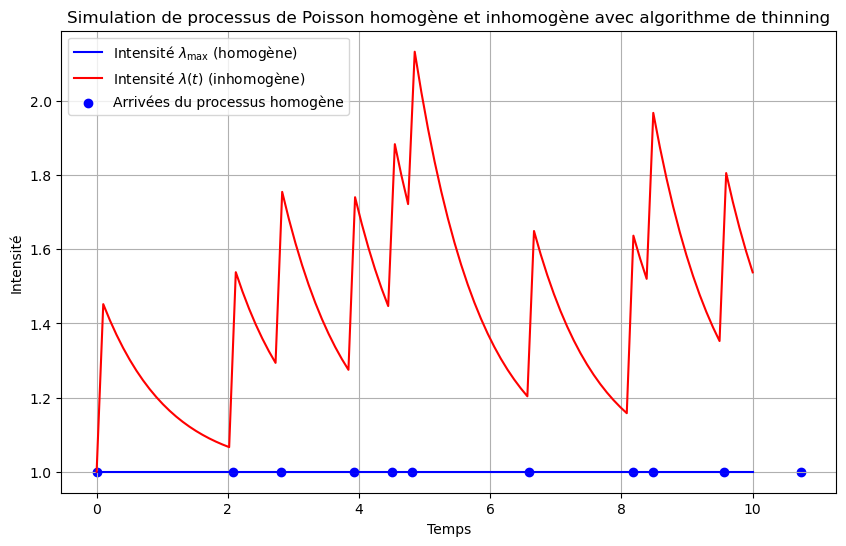

In [ ]:
###########CHATGPT FLORIAN

import numpy as np
import matplotlib.pyplot as plt

# Définition des paramètres
mu = 1.0
alpha = 0.5
beta = 1.0
T = 10

# Génération de la séquence des événements
homogeneous_events = np.array([0])  # Initialisation avec N(0) = 0
t = 0
while t < T:
    t_next = t + np.random.exponential(1 / mu)
    homogeneous_events = np.append(homogeneous_events, t_next)
    t = t_next

# Fonction lambda(t)
def lambda_func(t, events):
    return mu + np.sum(alpha * np.exp(-beta * (t - events[events < t])))

# Création des abscisses et des ordonnées pour le processus homogène
t_homogeneous = np.linspace(0, T, 100)
lambda_homogeneous = np.array([mu] * len(t_homogeneous))

# Création des abscisses et des ordonnées pour le processus inhomogène
lambda_inhomogeneous = np.array([lambda_func(t, homogeneous_events) for t in t_homogeneous])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_homogeneous, lambda_homogeneous, label='Intensité $\lambda_{\mathrm{max}}$ (homogène)', color='blue')
plt.plot(t_homogeneous, lambda_inhomogeneous, label='Intensité $\lambda(t)$ (inhomogène)', color='red')
plt.scatter(homogeneous_events, [mu] * len(homogeneous_events), color='blue', marker='o', label='Arrivées du processus homogène')
plt.xlabel('Temps')
plt.ylabel('Intensité')
plt.title('Simulation de processus de Poisson homogène et inhomogène avec algorithme de thinning')
plt.legend()
plt.grid(True)
plt.show()

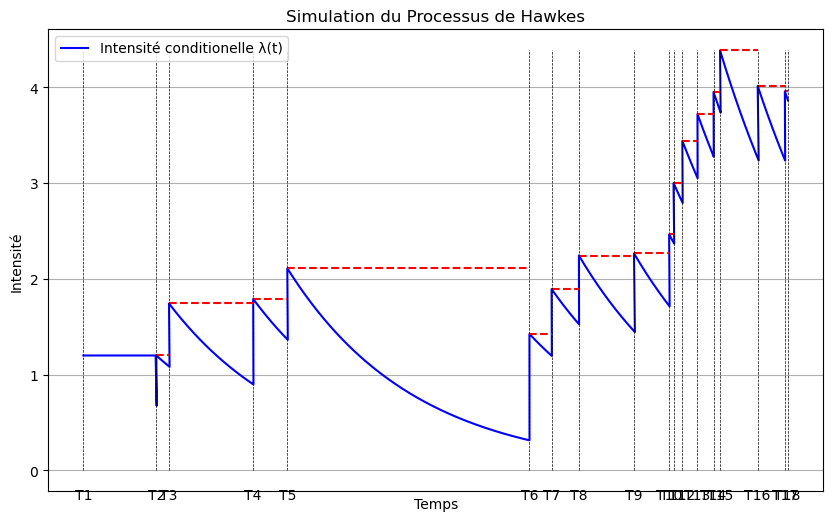

In [1]:
####VERSION ACHILLE

import numpy as np
import matplotlib.pyplot as plt
def intensity(s, T, alpha, beta, mu):
    """
    Calcule l'intensité du processus de Hawkes à l'instant s.
    """
    intensity_value = mu
    for tau in T:
        intensity_value += alpha * np.exp(-beta * (s - tau))
    return intensity_value
def sim_Hawkes(mu, alpha, beta, T):
    """
    Simule un processus de Hawkes.
    """
    t = []
    s = 0
    n = 0
    times = [0]
    events_count = [0]
    intensity_hawkes =[mu]

    while s < T:
        lambda_bar = intensity(s, t, alpha, beta, mu)
        u = np.random.uniform(0, 1)
        w = -np.log(u) / lambda_bar
        s += w
        D = np.random.uniform(0, 1)
        lambda_s = intensity(s, t, alpha, beta, mu)
        if D * lambda_bar <= lambda_s:
            n += 1
            t.append(s)
            times.append(s)
            events_count.append(n)
            intensity_hawkes.append(lambda_s)

    if t[-1] <= T:
        return times, events_count, intensity_hawkes
    else:
        return times[:-1], events_count[:-1], intensity_hawkes[:-1]
# Paramètres d'exemple
mu = 1.2
alpha = 0.6
beta = 0.8
T = 7

# Simulation du processus de Hawkes
times, events_count, intensity_hawkes = sim_Hawkes(mu, alpha, beta, T)
# Interpolation exponentielle décroissante entre les points de données
interpolated_intensity = []
interpolated_times = []
intensity_s_values = []
intensity_s_next_values = []

max_intensity_per_interval = []
intensity_prev = []
for i in range(len(times) - 1):
    max_intensity_per_interval.append(max(intensity_hawkes[i], intensity_hawkes[i+1]))



for i in range(len(intensity_hawkes) - 1):
    s, s_next = times[i], times[i + 1]
    intensity_s, intensity_s_next = intensity_hawkes[i], intensity_hawkes[i + 1]
    interpolated_intensity.append(intensity_s)
    interpolated_times.append(s)
    intensity_s_values.append(intensity_s)
    intensity_s_next_values.append(intensity_s_next)
    while s < s_next:
        s += 0.01  # pas de temps pour l'interpolation
        # Si on est entre T1 et T2, la valeur de l'intensité est constante à mu
        if times[0] <= s < times[1]:
            interpolated_intensity.append(mu)
        else:
            interpolated_intensity.append(intensity_s * np.exp(-beta * (s - times[i])))
        interpolated_times.append(s)

# Ajout de la dernière valeur d'intensité
#interpolated_intensity.append(intensity_hawkes[-1])
#interpolated_times.append(times[-1])



# tracé de l'intensité conditionelle λ(t)
plt.figure(figsize=(10, 6))
plt.plot(interpolated_times, interpolated_intensity, color='blue', linestyle='-', label='Intensité conditionelle λ(t)')

# on trace en pointillé rouge le M
for i in range(len(intensity_s_values)):
    if i != 0:  # Si ce n'est pas le premier saut
        plt.hlines(y=intensity_s_values[i], xmin=times[i], xmax=times[i+1], color='red', linestyle='--')

# pour tracer les droites verticales au moment des sauts
for i, t in enumerate(times):
    plt.vlines(x=t, ymin=0, ymax=max(intensity_s_values), color='black', linestyle='--',linewidth=0.5)

# on nomme les sauts T1, T2 ...
for i, t in enumerate(times):
    plt.text(t, -0.3, f"T{i+1}", ha='center', color='black')

plt.xticks([])
plt.xlabel('Temps')
plt.ylabel('Intensité')
plt.title('Simulation du Processus de Hawkes')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
#### VERSION THIBAULT
import numpy as np
import matplotlib.pyplot as plt
def intensity(s, T, alpha, beta, mu):
    """
    Calcule l'intensité du processus de Hawkes à l'instant s.
    """
    intensity_value = mu
    for tau in T:
        intensity_value = alpha +np.sin(tau)
    return intensity_value
def sim_Hawkes(mu, alpha, beta, T):
    """
    Simule un processus de Hawkes.
    """
    t = []
    s = 0
    n = 0
    times = [0]
    events_count = [0]
    intensity_hawkes =[mu]

    while s < T:
        lambda_bar = intensity(s, t, alpha, beta, mu)
        u = np.random.uniform(0, 1)
        w = -np.log(u) / lambda_bar
        s += w
        D = np.random.uniform(0, 1)
        lambda_s = intensity(s, t, alpha, beta, mu)
        if D * lambda_bar <= lambda_s:
            n += 1
            t.append(s)
            times.append(s)
            events_count.append(n)
            intensity_hawkes.append(lambda_s)

    if t[-1] <= T:
        return times, events_count, intensity_hawkes
    else:
        return times[:-1], events_count[:-1], intensity_hawkes[:-1]
# Paramètres d'exemple
mu = 1.2
alpha = 0.6
beta = 0.8
T = 10

# Simulation du processus de Hawkes
times, events_count, intensity_hawkes = sim_Hawkes(mu, alpha, beta, T)

# Interpolation exponentielle décroissante entre les points de données
interpolated_intensity = []
interpolated_times = []
intensity_s_values = []
intensity_s_next_values = []

max_intensity_per_interval = []
intensity_prev = []
for i in range(len(times) - 1):
    max_intensity_per_interval.append(max(intensity_hawkes[i], intensity_hawkes[i+1]))



for i in range(len(intensity_hawkes) - 1):
    s, s_next = times[i], times[i + 1]
    intensity_s, intensity_s_next = intensity_hawkes[i], intensity_hawkes[i + 1]
    interpolated_intensity.append(intensity_s)
    interpolated_times.append(s)
    intensity_s_values.append(intensity_s)
    intensity_s_next_values.append(intensity_s_next)
    while s < s_next:
        s += 0.01  # pas de temps pour l'interpolation
        interpolated_intensity.append(intensity_s * np.exp(-beta * (s - times[i])))
        interpolated_times.append(s)

# Ajout de la dernière valeur d'intensité
interpolated_intensity.append(intensity_hawkes[-1])
interpolated_times.append(times[-1])

# Tracé de l'intensité en fonction du temps avec échelle logarithmique
plt.figure(figsize=(10, 6))
plt.plot(interpolated_times, interpolated_intensity, color='blue', linestyle='-', label='Interpolation exponentielle')

# Tracé des points intensity_s et intensity_s_next
plt.scatter(times[:-1], intensity_s_values, color='blue', marker='^', label='REJECTED')
plt.scatter(times[1:], intensity_s_next_values, color='blue', marker='^')

for i, max_intensity in enumerate(max_intensity_per_interval):
    plt.axhline(y=max_intensity, color='green', linestyle='--')

plt.xlabel('Temps')
plt.ylabel('Intensité')
plt.title('Simulation du Processus de Hawkes')
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

## C- Intérêts et limites du processus de Hawkes

Les processus de Hawkes, de part leur prise en compte du passé et des phénomènes de réplique, ont un grand intérêt dans des domaines tels que la finance, la neuroscience (comportements quant à l'activation des neurones), la gestion du risque (risque terroriste, sismique), et plus généralement l'étude d'événements aléatoires ayant des comportement d'auto-excitation ou des tendances à se répéter successivement. Ils intègrent une noton de mémoire à travers l'expressions de l'intensité du processus ce qui permet une modélisation beaucoup plus fine, permettant de capter la dépendance temporelle des événements.

Un tel type de tendance d'un processus stochastique à générer des rafales d'événements dans le temps, avec un pic soudain d'intensité d'événéments successifs à un événément précédent est appelé "phénomène de burst".


D'après l'article suivant https://www.tandfonline.com/doi/full/10.1080/14697688.2017.1403131?scroll=top&needAccess=true, en neurosciences, le processus de Hawkes servirait à modéliser des comportements liés à l'activation des neurones. En écologie, il servirait à détecter des baleines, des colonies d'araignées ou des espèces invasives. En épidémiologie, il permet notamment d'étudier les récurrences des épidémies, et de façon analogue en sociologie la récurrence des crimes et d'actes terroristes. Il pourrait être utilisé pour surveiller les défaillances énérgétiques des systèmes de production d'électricité, le e-marketing...
Ses applications sont donc tres variées.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def intensity_ETAS(s, t, T, lambda0, K, alpha, M0, c, p):
    """
    Calcule l'intensité du processus de Hawkes ETAS à l'instant s.
    """
    intensity_value = lambda0
    for ti in t:
        if ti < s:
            intensity_value += K * np.exp(alpha * (ti - M0)) / ((s - ti + c) ** p)
    return intensity_value

def sim_Hawkes_ETAS(lambda0, K, alpha, M0, c, p, T):
    """
    Simule un processus de Hawkes ETAS.
    """
    t = []
    s = 0
    n = 0
    times = [0]
    events_count = [0]
    intensity_hawkes = [lambda0]

    while s < T:
        lambda_bar = intensity_ETAS(s, t, times, lambda0, K, alpha, M0, c, p)
        u = np.random.uniform(0, 1)
        w = -np.log(u) / lambda_bar
        s += w
        D = np.random.uniform(0, 1)
        lambda_s = intensity_ETAS(s, t, times, lambda0, K, alpha, M0, c, p)
        if D * lambda_bar <= lambda_s:
            n += 1
            t.append(s)
            times.append(s)
            events_count.append(n)
            intensity_hawkes.append(lambda_s)

    if t[-1] <= T:
        return times, events_count, intensity_hawkes
    else:
        return times[:-1], events_count[:-1], intensity_hawkes[:-1]

# Paramètres d'exemple pour le modèle ETAS
lambda0 = 1.0
K = 0.5
alpha = 0.3
M0 = 0.0
c = 0.1
p = 1.5
T = 7

# Simulation du processus de Hawkes ETAS
times, events_count, intensity_hawkes = sim_Hawkes_ETAS(lambda0, K, alpha, M0, c, p, T)

# Tracé de l'intensité conditionnelle λ*(t)
plt.figure(figsize=(10, 6))
plt.plot(times, intensity_hawkes, color='blue', linestyle='-', label='Intensité conditionelle λ*(t)')

plt.xlabel('Temps')
plt.ylabel('Intensité')
plt.title('Simulation du Processus de Hawkes ETAS')
plt.legend()
plt.grid(True)
plt.show()
